# AutoscoutDataAnalysis

## Descriptive statistics: correlation analysis between features and target values

## Authors : 
- Mozerski Alex
- Fraile Diego
- Spycher Damian

### Imports

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import networkx as nx
import ipywidgets as widgets
from IPython.display import display, clear_output

### Constant

In [51]:
DATA_FILE = os.path.join(os.getcwd(), 'cleaned_cars.csv')

### Data Loading

In [54]:
df = pd.read_csv(DATA_FILE, header=[0], index_col=0)


### Overview of the dataset

In [55]:
df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
url,,,,,,,,,,,,,,,,,,,,
https://www.autoscout24.com/offers/alfa-romeo-159-berlina-2-0-jtdm-super-diesel-red-7140b39f-39f8-4707-833e-3ac1344299b2,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4.0,5.0,front,134.0,used,grey,NaN,2011.0,it
https://www.autoscout24.com/offers/alfa-romeo-159-1-8-tbi-elegante-gasoline-red-edd10d3e-53b3-4201-9d2b-73216507df12,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4.0,5.0,front,NaN,used,NaN,NaN,2010.0,es
https://www.autoscout24.com/offers/renault-others-dauphin-gasoline-yellow-762bffc3-b9b0-4c4b-b14d-f066356eb926,renault,unknown,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,NaN,NaN,NaN,NaN,used,NaN,alcantara,1963.0,be
https://www.autoscout24.com/offers/opel-antara-2-4-16v-temptation-trekhaak-gasoline-black-09934fcb-5180-47e3-9c90-e1cdb6215977,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5.0,5.0,4wd,229.0,used,NaN,metallic,2008.0,nl
https://www.autoscout24.com/offers/alfa-romeo-giulia-2-0-turbo-automatik-ti-q4-leder-navi-kamera-gasoline-white-7e452f2c-a446-4b1d-a072-20462e8d2d2b,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4.0,4.0,front,NaN,employee's car,full leather,black,2023.0,de


In [56]:
df.describe()

,price,mileage,power,engine_size,doors,seats,emission_class,year
count,1.542400e+04,1.524300e+04,15188.000000,13798.000000,11156.00000,14094.000000,9373.000000,14706.000000
mean,8.716821e+04,7.117497e+04,256.918357,2507.970938,4.28971,4.411310,165.180049,2015.442812
std,8.615921e+05,1.320222e+05,192.407035,1695.403824,1.12323,1.143213,93.675774,10.633694
min,1.000000e+00,0.000000e+00,1.000000,0.000000,2.00000,2.000000,0.000000,1923.000000
25%,1.499900e+04,1.800650e+04,122.000000,1496.000000,4.00000,4.000000,115.000000,2014.000000
50%,2.499000e+04,5.460400e+04,179.000000,1987.000000,5.00000,5.000000,139.000000,2019.000000
75%,4.690000e+04,1.024815e+05,326.000000,2993.000000,5.00000,5.000000,191.000000,2021.000000
max,1.000000e+08,9.999999e+06,1600.000000,67500.000000,5.00000,7.000000,2370.000000,2024.000000


In [59]:
print("Missing data in each column:")

print(df.isnull().sum())

Missing data in each column:
brand                  2
model                  0
price                  2
mileage              183
fuel_type             28
color                112
gearbox              403
power                238
engine_size         1628
seller                 2
body_type              2
doors               4270
seats               1332
drivetrain          3892
emission_class      6053
condition              2
upholstery          4418
upholstery_color    3968
year                 720
country                4
dtype: int64


## Preprocessing

In [ ]:
# keep only the numerical columns
df_only_numerical = df.select_dtypes(include = ['float64', 'int64'])

# analyze the outliers
for i in df_only_numerical.columns:
    plt.figure()
    df.boxplot(i)
    plt.show()

### cleaned the outliers

In [ ]:
# Remove prices above 1'000'000
df = df[df['price'] < 1_000_000]

# Plot the boxplot again
plt.figure()
df.boxplot('price')
plt.show()

## Analyze Correlation

In [ ]:
# analyze all pairs of features
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

In [ ]:
# plot the pairplot
sns.pairplot(df, vars=['price', 'mileage', 'power', 'engine_size', 'doors', 'emission_class', 'seats', 'year'])
plt.show() 

## Correlation Matrix with Dendrogram

In [ ]:
# keep only the numerical columns
corr = df_only_numerical.corr()
sns.clustermap(corr, cmap='coolwarm', figsize=(10, 8))
plt.title('Correlation Matrix with Dendrogram')
plt.show()

## Netwrork graph for correlation

In [ ]:
G = nx.Graph()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        G.add_edge(corr.columns[i], corr.columns[j], weight=corr.iloc[i, j])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]
nx.draw(G, pos, edgelist=edges, width=weights, with_labels=True, node_color='skyblue', node_size=3000, font_size=10)
plt.title('Correlation Network Graph')
plt.show()

In [ ]:
pearson_corr = df_only_numerical.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

In [ ]:
spearman_corr = df_only_numerical.corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)

### Analyzing with no-numerical features

In [43]:
df = pd.read_csv(DATA_FILE, header=[0], index_col=0)

c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


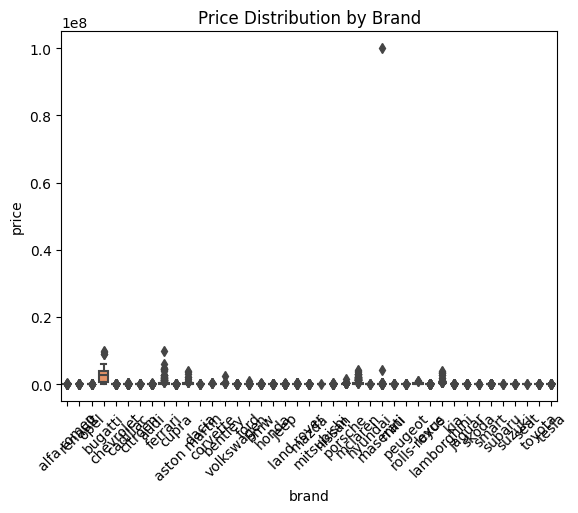

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'brand' and 'price'
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.title('Price Distribution by Brand')
plt.show()

In [46]:
import pandas as pd
import scipy.stats as stats

# Grouping prices by brands
grouped_data = df.groupby('brand')['price'].apply(list)

# ANOVA test
F, p = stats.f_oneway(*grouped_data)
print(f'ANOVA test results: F={F}, p={p}')

ANOVA test results: F=20.87978093204301, p=4.971166878496127e-145


In [47]:
mean_prices = df.groupby('brand')['price'].mean().sort_values(ascending=False)
print(mean_prices)

brand
bugatti         2.865897e+06
ferrari         4.190881e+05
lamborghini     4.118420e+05
mclaren         4.045118e+05
maserati        3.363512e+05
rolls-royce     2.632862e+05
aston martin    2.082767e+05
bentley         1.381042e+05
porsche         9.413484e+04
corvette        7.162702e+04
land rover      4.739650e+04
cadillac        4.247429e+04
tesla           4.070608e+04
audi            3.965749e+04
bmw             3.917528e+04
jaguar          3.327013e+04
lexus           3.207163e+04
cupra           3.146737e+04
chevrolet       2.895969e+04
subaru          2.855814e+04
alfa romeo      2.687132e+04
jeep            2.617865e+04
ford            2.479369e+04
toyota          2.309762e+04
hyundai         2.299946e+04
skoda           2.264438e+04
honda           2.239696e+04
kia             2.136927e+04
volkswagen      2.134938e+04
mazda           2.127990e+04
nissan          2.086223e+04
seat            1.877034e+04
mini            1.753040e+04
mitsubishi      1.738749e+04
suzuki  

In [ ]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True)  # One-hot encode the brand column

## Results of analyzing
1. Strong predictors of price: features like **power**, **engine size**, and **emission class** are closely linked to **price**.. It suggests they are significant in determining car prices, likely because they reflect the car's performance and compliance with environmental standards.
2. The correlation between **power and engine size** is a fundamental mechanical relationship. They would be very effective due to their strong correlation with price. 

